In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numba import jit, njit, prange
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('x.csv',index_col='datetime')#X gonna give it to you!

In [3]:
df.index = pd.to_datetime(df.index) #Parse it to dtype=datetime64[ns] <3 

In [4]:
df

,INNDAER 1,AM-LUTVLAS A,BOR VEKT A,DOLOM VEKT A,Kalivekt A,MGO VEKT,NPLUT-INND A,SALTVEKT TT W3401,Turtallsreg. Fuge A,Temperatur mikser A1,...,Turtallsreg. Fuge B,Temperatur mikser B1,Temperatur mikser B3,Temperatur T3402 inndamping væskelås,Væskelås B -> MIX B,Væskelås B -> MIX A,Væskelås A -> MIX B,Væskelås A -> MIX A,NPLUT-INND B,neoScattering
datetime,,,,,,,,,,,,,,,,,,,,,
2020-08-18 14:44:56,0.789520,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,39.137028,18.25,59.145401,60.144390,...,317.750061,140.439026,139.366135,188.850662,False,True,False,True,39.106194,3.713000
2020-08-18 14:45:06,0.789520,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,38.605223,18.25,59.145401,60.144390,...,319.180603,140.420151,139.357552,188.850662,False,True,False,True,39.029465,3.467000
2020-08-18 14:45:16,0.788770,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,38.236488,18.25,59.145401,60.144390,...,311.425903,140.372963,139.346823,188.850662,False,True,False,True,38.909505,2.857000
2020-08-18 14:45:26,0.788711,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,38.572107,18.25,59.145401,60.144390,...,313.719007,140.335213,139.338241,188.850662,False,True,False,True,38.927600,3.693333
2020-08-18 14:45:36,0.789238,35.193295,7.175123e+00,3.725291e-09,4.890487,0.092953,38.884985,18.25,59.145401,60.360954,...,314.340607,140.314770,139.327512,188.850662,False,True,False,True,38.991754,3.141500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15 07:18:36,0.898348,26.941476,2.802597e-45,4.132613e-03,0.009759,0.754966,37.239871,22.00,299.957809,61.761684,...,1.947914,115.857697,113.409899,178.957936,False,False,False,False,37.565578,1.625000
2020-10-15 07:18:46,0.898117,27.295568,2.802597e-45,4.132613e-03,0.009759,0.754966,37.089793,22.00,299.993561,60.829855,...,1.947914,115.444435,113.115845,178.910358,False,False,False,False,37.622098,1.504000
2020-10-15 07:18:56,0.897887,27.190544,2.802597e-45,4.132613e-03,0.009759,0.754966,36.989279,22.00,300.681403,60.251680,...,1.947914,114.989449,112.706546,178.869713,False,False,False,False,37.677619,1.473000


In [5]:
df.index.freq = '10s'

In [6]:
df.index

DatetimeIndex(['2020-08-18 14:44:56', '2020-08-18 14:45:06',
               '2020-08-18 14:45:16', '2020-08-18 14:45:26',
               '2020-08-18 14:45:36', '2020-08-18 14:45:46',
               '2020-08-18 14:45:56', '2020-08-18 14:46:06',
               '2020-08-18 14:46:16', '2020-08-18 14:46:26',
               ...
               '2020-10-15 07:17:46', '2020-10-15 07:17:56',
               '2020-10-15 07:18:06', '2020-10-15 07:18:16',
               '2020-10-15 07:18:26', '2020-10-15 07:18:36',
               '2020-10-15 07:18:46', '2020-10-15 07:18:56',
               '2020-10-15 07:19:06', '2020-10-15 07:19:16'],
              dtype='datetime64[ns]', name='datetime', length=498447, freq='10S')

In [7]:
df

,INNDAER 1,AM-LUTVLAS A,BOR VEKT A,DOLOM VEKT A,Kalivekt A,MGO VEKT,NPLUT-INND A,SALTVEKT TT W3401,Turtallsreg. Fuge A,Temperatur mikser A1,...,Turtallsreg. Fuge B,Temperatur mikser B1,Temperatur mikser B3,Temperatur T3402 inndamping væskelås,Væskelås B -> MIX B,Væskelås B -> MIX A,Væskelås A -> MIX B,Væskelås A -> MIX A,NPLUT-INND B,neoScattering
datetime,,,,,,,,,,,,,,,,,,,,,
2020-08-18 14:44:56,0.789520,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,39.137028,18.25,59.145401,60.144390,...,317.750061,140.439026,139.366135,188.850662,False,True,False,True,39.106194,3.713000
2020-08-18 14:45:06,0.789520,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,38.605223,18.25,59.145401,60.144390,...,319.180603,140.420151,139.357552,188.850662,False,True,False,True,39.029465,3.467000
2020-08-18 14:45:16,0.788770,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,38.236488,18.25,59.145401,60.144390,...,311.425903,140.372963,139.346823,188.850662,False,True,False,True,38.909505,2.857000
2020-08-18 14:45:26,0.788711,35.193295,7.175123e+00,3.725291e-09,4.880990,0.092953,38.572107,18.25,59.145401,60.144390,...,313.719007,140.335213,139.338241,188.850662,False,True,False,True,38.927600,3.693333
2020-08-18 14:45:36,0.789238,35.193295,7.175123e+00,3.725291e-09,4.890487,0.092953,38.884985,18.25,59.145401,60.360954,...,314.340607,140.314770,139.327512,188.850662,False,True,False,True,38.991754,3.141500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15 07:18:36,0.898348,26.941476,2.802597e-45,4.132613e-03,0.009759,0.754966,37.239871,22.00,299.957809,61.761684,...,1.947914,115.857697,113.409899,178.957936,False,False,False,False,37.565578,1.625000
2020-10-15 07:18:46,0.898117,27.295568,2.802597e-45,4.132613e-03,0.009759,0.754966,37.089793,22.00,299.993561,60.829855,...,1.947914,115.444435,113.115845,178.910358,False,False,False,False,37.622098,1.504000
2020-10-15 07:18:56,0.897887,27.190544,2.802597e-45,4.132613e-03,0.009759,0.754966,36.989279,22.00,300.681403,60.251680,...,1.947914,114.989449,112.706546,178.869713,False,False,False,False,37.677619,1.473000


In [65]:
man_val_timespans = [
    (
        datetime(2020,8,28,7,47,26),
        datetime(2020,9,17,7,28,16)
    ),
    (
        datetime(2020,9,22,8,56,6),
        datetime(2020,10,15,7,19,16)
    )
]

In [66]:
man_sub_x = []
for (fra, til) in man_val_timespans:
    man_sub_x.append(df[fra:til])

In [67]:
man_sub_x

[                     INNDAER 1  AM-LUTVLAS A  BOR VEKT A  DOLOM VEKT A  \
 datetime                                                                 
 2020-08-28 07:47:26   0.789861     26.786908   12.025037  3.725291e-09   
 2020-08-28 07:47:36   0.789803     26.733138   12.025278  3.725291e-09   
 2020-08-28 07:47:46   0.789745     26.679369   12.025518  3.725291e-09   
 2020-08-28 07:47:56   0.789687     27.075109   12.025759  3.725291e-09   
 2020-08-28 07:48:06   0.789629     26.816600   12.026000  3.725291e-09   
 ...                        ...           ...         ...           ...   
 2020-09-17 07:27:36   0.901808      0.167222    2.867124  9.557714e-03   
 2020-09-17 07:27:46   0.901458      0.167346    2.867167  9.557862e-03   
 2020-09-17 07:27:56   0.901085      0.167470    2.867209  9.558010e-03   
 2020-09-17 07:28:06   0.900700      0.167593    2.867252  9.558158e-03   
 2020-09-17 07:28:16   0.900379      0.167697    2.867288  9.558281e-03   
 
                      K

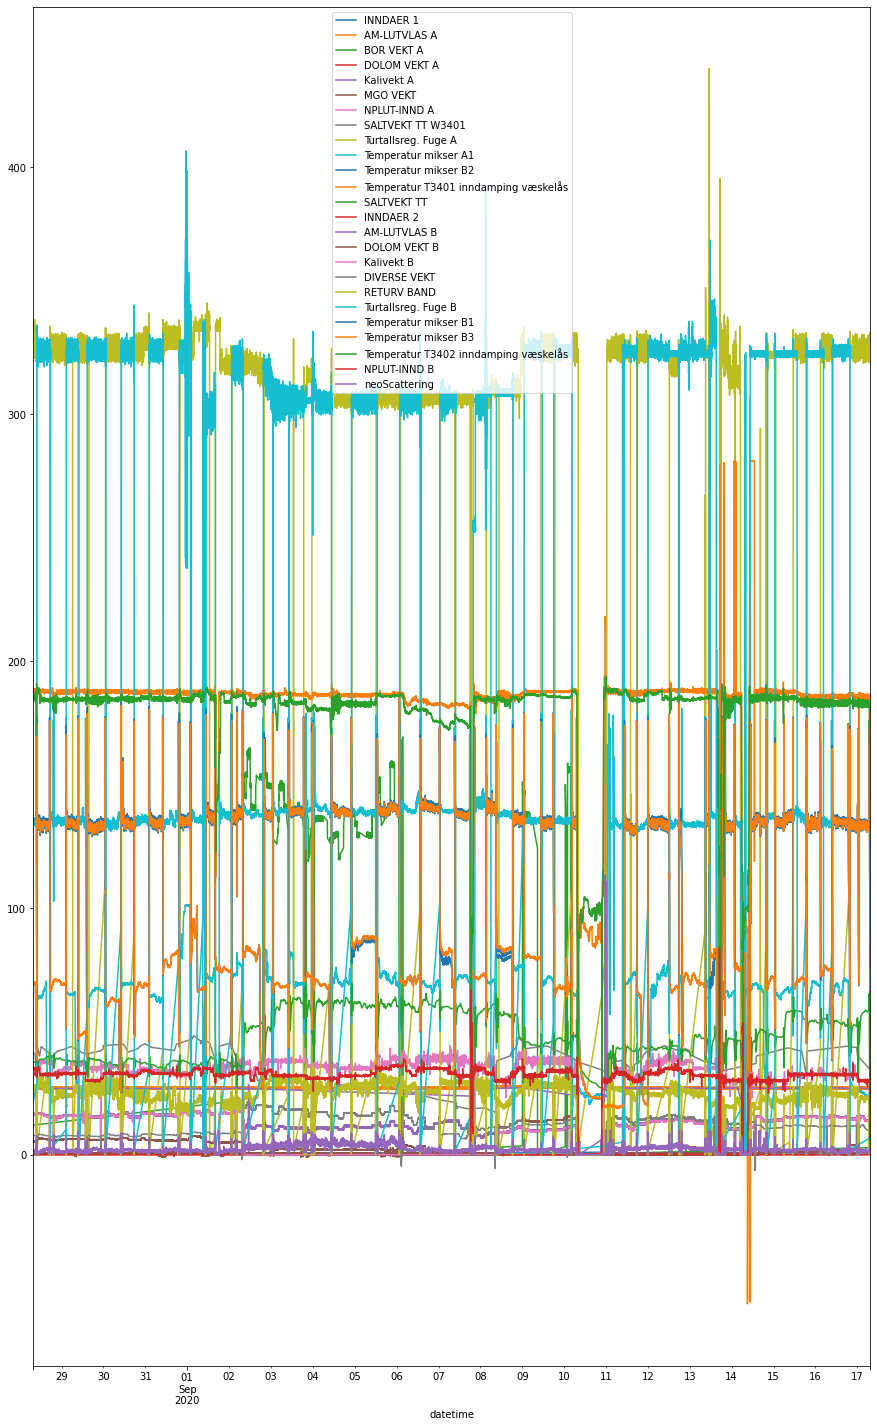

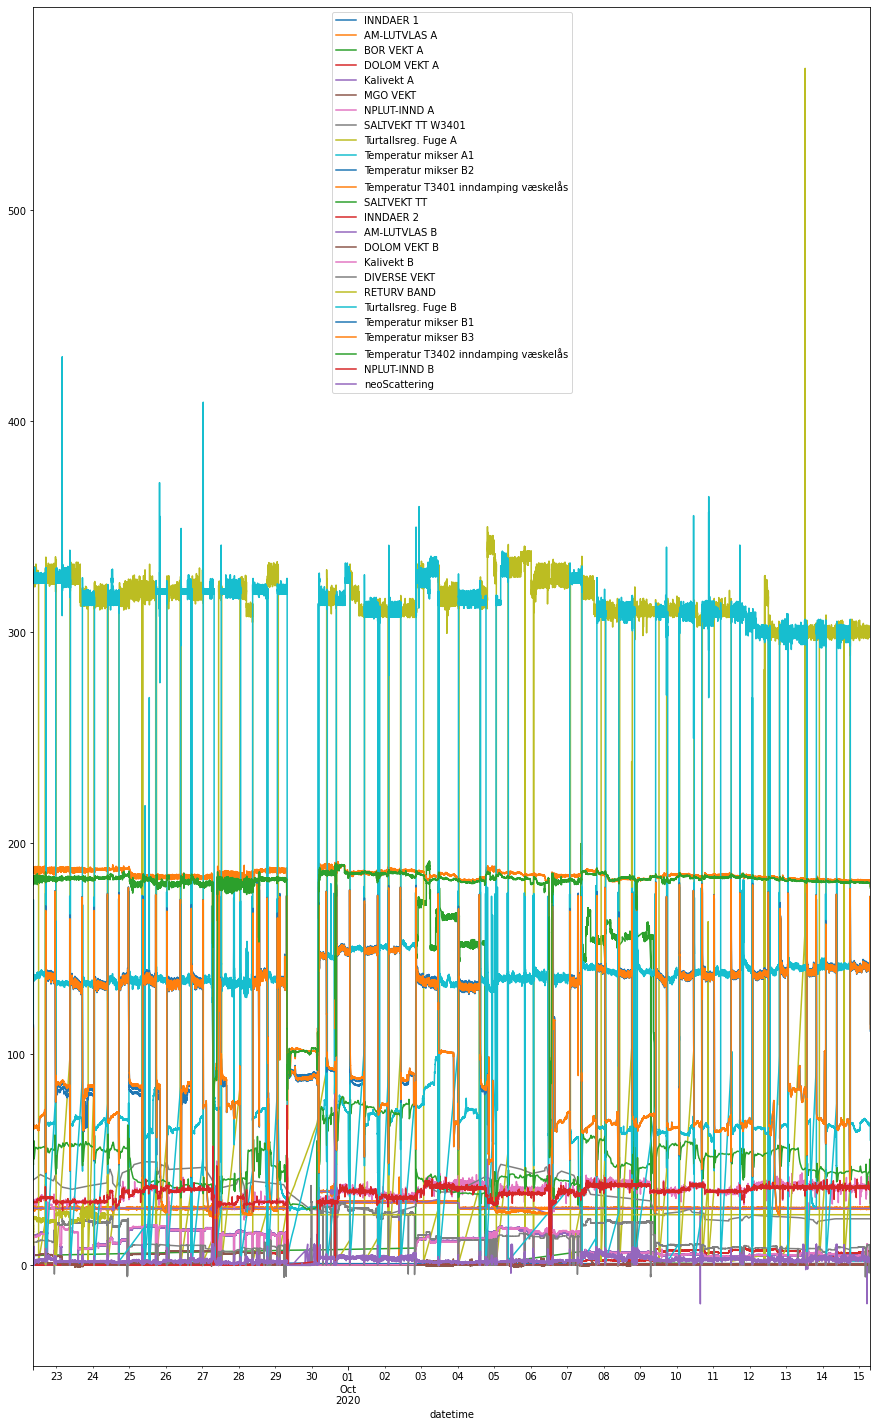

In [68]:
for _df in man_sub_x:
    _df.plot(figsize=(15,25))

In [69]:
for df_ in man_sub_x:
    st = df_.index[0]
    ed = df_.index[len(df_)-1]
    hours_of_data = round((ed-st).total_seconds()/60/60)
    df_.to_csv(str(st.year)+'-'+str(st.month)+'-'+str(st.day)+'--'+str(hours_of_data)+'hours.csv')

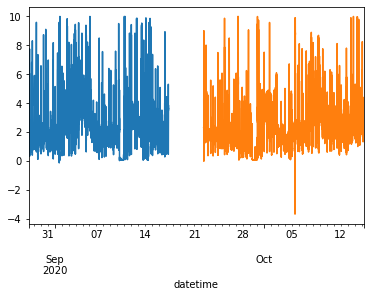

In [71]:
for df_ in man_sub_x:
    df_['neoScattering'].plot()